# Datenverfügbarkeit

In [9]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from RadarLidarWindSpeed import RadarLidarWindSpeed

In [10]:
dateBegin = datetime(2020, 1, 1)
dateEnd = datetime(2020, 2, 1)

In [11]:
analysis = RadarLidarWindSpeed(dateBegin, dateEnd)
analysis.importDataset()
result = analysis.getCoverageHeightTimeSeries()

In [12]:
X,Y = np.meshgrid(analysis.days, analysis.heightGrid)
radarCoverage = result.pivot(index="height", columns="day", values="radar Coverage")#.to_numpy()
lidarCoverage = result.pivot(index="height", columns="day", values="lidar Coverage")#.to_numpy()
totalCoverage = result.pivot(index="height", columns="day", values="total Coverage")#.to_numpy()

In [13]:
timelineTotal = []

for day in analysis.days:
    timelineTotal.append(totalCoverage[day].mean())

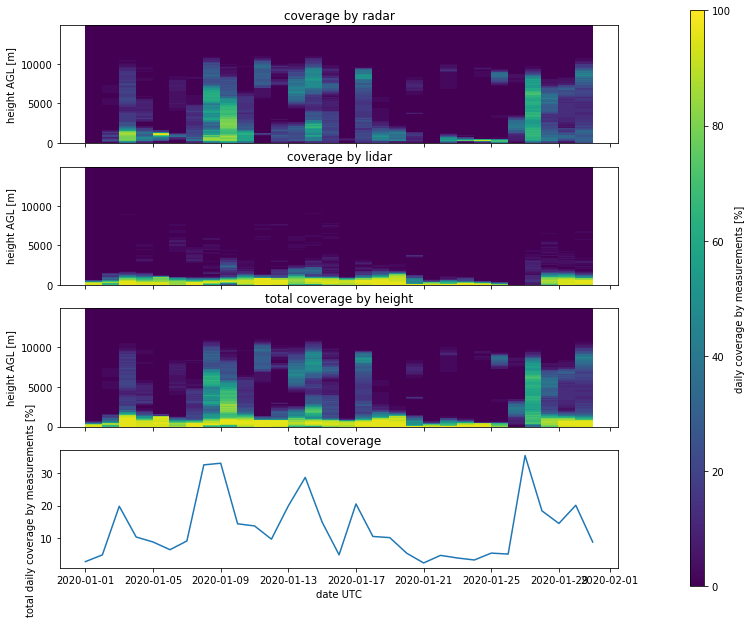

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10), sharex=True, sharey=False)
#fig.suptitle("September 2020", fontsize=16)


days_extende = np.arange(dateBegin, dateEnd+timedelta(days=1), timedelta(days=1)).astype(datetime)

axes[0].set_title("coverage by radar")
#axes[0].axis([0, 24, 0, maxHeight])
im = axes[0].pcolor(X,Y,radarCoverage,cmap='viridis',vmin=0,vmax=100)
axes[0].set_ylabel("height AGL [m]")

axes[1].set_title("coverage by lidar")
#axes[0].axis([0, 24, 0, maxHeight])
im = axes[1].pcolor(X,Y,lidarCoverage,cmap='viridis',vmin=0,vmax=100)
axes[1].set_ylabel("height AGL [m]")

axes[2].set_title("total coverage by height")
#axes[0].axis([0, 24, 0, maxHeight])
im = axes[2].pcolor(X,Y,totalCoverage,cmap='viridis',vmin=0,vmax=100)
axes[2].set_ylabel("height AGL [m]")


axes[3].set_title("total coverage ")
im2 = axes[3].plot(analysis.days,timelineTotal)
axes[3].set_ylabel("total daily coverage by measurements [%]")
axes[3].set_xlabel("date UTC")


cb_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('daily coverage by measurements [%]')

plt.show()